In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
from datetime import datetime
from matplotlib import style
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import RANSACRegressor
import scipy.stats

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

from patsy import dmatrices
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')

Net_df['inf_time'] = pd.to_datetime(Net_df['inf_time'], format="%Y-%m-%d", errors='ignore')
Net_df['inf_time'] = Net_df['inf_time'].dt.date
Net_df['Primary_id'] = Net_df['Primary_id'].astype(int)

In [3]:
# 전체구간 plot 지우지마!!
#!/usr/bin/python
# -*- coding:utf-8 -*-
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import RANSACRegressor
import scipy.stats

style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"

# Net_df = pd.read_csv('Net_df_1118_total_region.csv')
# for i in Net_df.index:
#     Net_df.loc[i, 'inf_time'] = datetime.strptime(Net_df.loc[i, 'inf_time'], "%Y-%m-%d").date()

# target_date = ['2021-02-26', '2021-07-07']
# target_date = ['2021-07-07', '2021-09-16']
target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12', '2021-09-16']
# target_date = ['2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12', '2021-09-16']
#target_date = ['2020-01-19', '2021-07-15']
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()
# plt.figure(figsize=(27,12))
for i in range(len(target_date)-1):
    if i <  6:
        Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]


        #total_date = datetime(2021, 7, 11) - datetime(2020, 1, 30)
        total_date = target_date[i + 1] - target_date[i] 
        Net_df_Unknown = Net_df_1[Net_df_1['Primary_id'] == 0]
        Net_df_asym = Net_df_1[Net_df_1['Onset_date'] == '0']
        date_inf_1, val_unknown_1, val_inf_1, val_asym_1 = [],[],[],[]
        # print(i)
        # print(total_date.day)
        # print(target_date)
                
        for i_i_k in range(total_date.days):
            

            # tmp_date = datetime(2020, 1, 30).date()+timedelta(days=i_i_k)
            tmp_date = target_date[i] + timedelta(days=i_i_k)
            
            date_inf_1.append(tmp_date)
            counter_inf = Net_df[Net_df['inf_time'] == tmp_date]
            if len(counter_inf) != 0:
                val_inf_1.append(len(counter_inf))
            
            elif len(counter_inf) == 0:
                val_inf_1.append(0)

            counter_unknown = Net_df_Unknown[Net_df_Unknown['inf_time'] == tmp_date]
            if len(counter_unknown) != 0:
                val_unknown_1.append(len(counter_unknown))
            
            elif len(counter_unknown) == 0:
                val_unknown_1.append(0)
                
                
            counter_asym = Net_df_asym[Net_df_asym['inf_time'] == tmp_date]
            if len(counter_asym) != 0:
                val_asym_1.append(len(counter_asym))
            
            elif len(counter_asym) == 0:
                val_asym_1.append(0)
                

        
        unknown_inf_rate = []
        asym_inf_rate = []
        asym_unknown_rate = []

        for ii in range(total_date.days):
            if val_inf_1[ii] == 0:
                unknown_inf_rate.append(0)
            else:
                unknown_inf_rate.append(val_unknown_1[ii]/val_inf_1[ii])

            if val_inf_1[ii] == 0:
                asym_inf_rate.append(0)
            else:
                asym_inf_rate.append(val_asym_1[ii]/val_inf_1[ii])
                # if val_asym_1[ii]/val_inf_1[ii] > 0.9:
                #     print(ii)
            if val_unknown_1[ii] == 0:
                asym_unknown_rate.append(0)
            else:
                asym_unknown_rate.append(val_asym_1[ii]/val_unknown_1[ii])
                
                
        # val_inf_1 = [i2/sum(val_inf_1) for i2 in val_inf_1]
        val_inf_1 = np.array(val_inf_1)
        
        val_unknown_1 = np.array(val_unknown_1)
        val_asym_1 = np.array(val_asym_1)
        unknown_inf_rate = np.array(unknown_inf_rate)
        asym_inf_rate = np.array(asym_inf_rate)
        asym_unknown_rate = np.array(asym_unknown_rate)

        
        # plt.figure(figsize=(18,18))
        # plt.subplot(2,3,i+1)
        plt.figure(figsize=(9,6))
        corr_coef1 = np.corrcoef(val_inf_1, unknown_inf_rate)[0,1]
        corr_coef2 = np.corrcoef(val_inf_1, asym_inf_rate)[0,1]
        m1, b1 = np.polyfit(val_inf_1, unknown_inf_rate, 1)
        m2, b2 = np.polyfit(val_inf_1, asym_inf_rate, 1)
        r1, p1 = scipy.stats.pearsonr(val_inf_1,unknown_inf_rate)
        r2, p2 = scipy.stats.pearsonr(val_inf_1, asym_inf_rate)
        
        
        for i2 in range(len(val_inf_1)):
            
            if val_inf_1[i2] == 0:
                val_inf_1[i2] = 1e-7
                
            if unknown_inf_rate[i2] == 0.0:
                unknown_inf_rate[i2] = 1e-7
            
            if asym_inf_rate[i2] == 0.0:
                asym_inf_rate[i2] = 1e-7
            
    
        ### 이분산성 관련
        hetero_data = pd.DataFrame({'unknown_inf_rate' : unknown_inf_rate,
                                    'val_inf_1' : val_inf_1,
                                    'asym_inf_rate' : asym_inf_rate})
        models_U = ols('unknown_inf_rate ~ val_inf_1', hetero_data).fit()
        param_U = models_U.params
        res_U = unknown_inf_rate - models_U.predict()
        
        models_A = ols('asym_inf_rate ~ val_inf_1', hetero_data).fit()
        param_A = models_A.params
        res_A = asym_inf_rate - models_A.predict()
        
        # Log 변환
        models_UL = ols('np.log(unknown_inf_rate) ~ val_inf_1', hetero_data).fit()
        param_UL = models_UL.params
        res_UL = np.log(unknown_inf_rate) - models_UL.predict()
        
        models_AL = ols('np.log(asym_inf_rate) ~ val_inf_1', hetero_data).fit()
        param_AL = models_AL.params
        res_AL = np.log(asym_inf_rate) - models_AL.predict()
        
        # Weight
        res_data = pd.DataFrame({'abs(res_U)' : abs(res_U),
                                'abs(res_A)' : abs(res_A),
                                'abs(res_UL)' : abs(res_UL),
                                'abs(res_AL)' : abs(res_AL),
                                'val_inf_1' : val_inf_1})

        res_U_model = ols('abs(res_U) ~ val_inf_1', res_data).fit()
        res_A_model = ols('abs(res_A) ~ val_inf_1', res_data).fit()

        w_U = res_U_model.predict()
        w_U = 1/(w_U ** 2)
        w_A = res_A_model.predict()
        w_A = 1/(w_A ** 2)

        models_UW = wls('np.log(unknown_inf_rate) ~ val_inf_1', hetero_data, weights = w_U).fit()
        param_UW = models_UW.params
        models_AW = wls('np.log(asym_inf_rate) ~ val_inf_1', hetero_data, weights = w_A).fit()
        param_AW = models_AW.params


        # Ransac
        
        X = val_inf_1.reshape(-1,1)
        y1 = unknown_inf_rate.reshape(-1,1)
        y2 = asym_inf_rate.reshape(-1,1)

        res_thres_U = [0.3, 0.3, 0.3, 0.1, 0.3, 0.3]
        res_thres_A = [0.2, 0.2, 0.1, 0.1, 0.1, 0.1]

        ransac1 = linear_model.RANSACRegressor(residual_threshold=res_thres_U[i], random_state=42, max_trials=10000)
        ransac2 = linear_model.RANSACRegressor(residual_threshold=res_thres_A[i], random_state=42, max_trials=10000)
        ransac1.fit(X, y1)
        ransac2.fit(X, y2)
        inlier_mask1 = ransac1.inlier_mask_
        inlier_mask2 = ransac2.inlier_mask_
        outlier_mask1 = np.logical_not(inlier_mask1)
        outlier_mask2 = np.logical_not(inlier_mask2)

        line_X = np.arange(X.min(), X.max())[:, np.newaxis]
        line_y_ransac1 = ransac1.predict(line_X)
        line_y_ransac2 = ransac2.predict(line_X)



        lw = 2
        plt.figure(figsize=(9,6))
        plt.scatter(X[inlier_mask1], y1[inlier_mask1], color='yellowgreen', marker='.',
                    label='Inliers')
        plt.scatter(X[outlier_mask1], y1[outlier_mask1], color='gold', marker='.',
                    label='Outliers')
        plt.plot(line_X, line_y_ransac1, color='cornflowerblue', linewidth=lw,
                label='Unlinked RANSAC regressor')
        plt.legend(loc='lower right')
        plt.xlabel("Input")
        plt.ylabel("Response")
        plt.ylim([0, 1])
        plt.show()
        
        plt.figure(figsize=(9,6))
        plt.scatter(X[inlier_mask2], y2[inlier_mask2], color='yellowgreen', marker='.',
                    label='Inliers')
        plt.scatter(X[outlier_mask2], y2[outlier_mask2], color='gold', marker='.',
                    label='Outliers')
        plt.plot(line_X, line_y_ransac2, color='cornflowerblue', linewidth=lw,
                label='Asym RANSAC regressor')
        plt.legend(loc='lower right')
        plt.xlabel("Input")
        plt.ylabel("Response")
        plt.ylim([0, 1])
        plt.show()


        ransac_res1 = y1[inlier_mask1] - ransac1.predict(X[inlier_mask1])
        ransac_res2 = y2[inlier_mask2] - ransac2.predict(X[inlier_mask2])
        X_in1 = X[inlier_mask1].reshape(1, -1)[0]
        X_in2 = X[inlier_mask2].reshape(1, -1)[0]
        y_in1 = y1[inlier_mask1].reshape(1, -1)[0]
        y_in2 = y2[inlier_mask2].reshape(1, -1)[0]
        ransac_res1 = ransac_res1.reshape(1,-1)[0]
        ransac_res2 = ransac_res2.reshape(1,-1)[0]

        ransac_df1 = pd.DataFrame({'X_in' : X_in1,
                                'y_in' : y_in1,
                                'ran_res' : ransac_res1})
        ransac_df2 = pd.DataFrame({'X_in' : X_in2,
                                'y_in' : y_in2,
                                'ran_res' : ransac_res2})
        

        # results
        print("Unlinked_hetero : y={0:.6f}x+{1:.1f}".format(param_U.val_inf_1, param_U.Intercept))
        print("Asym_hetero : y={0:.6f}x+{1:.1f}".format(param_A.val_inf_1, param_A.Intercept))
        print("Unlinked_log_hetero : y={0:.6f}x+{1:.1f}".format(param_UL.val_inf_1, param_UL.Intercept))
        print("Asym_log_hetero : y={0:.6f}x+{1:.1f}".format(param_AL.val_inf_1, param_AL.Intercept))
        print("Unlinked_weight_hetero : y={0:.6f}x+{1:.1f}".format(param_UW.val_inf_1, param_UW.Intercept))
        print("Asym_weight_hetero : y={0:.6f}x+{1:.1f}".format(param_AW.val_inf_1, param_AW.Intercept))
        print("Unlinked_ransac_hetero : y={0:.6f}x+{1:.1f}".format(ransac1.estimator_.coef_[0][0], ransac1.estimator_.intercept_[0]))
        print("Asym_ransac_hetero : y={0:.6f}x+{1:.1f}".format(ransac2.estimator_.coef_[0][0], ransac2.estimator_.intercept_[0]))
        
        expr1 = 'unknown_inf_rate ~ val_inf_1'
        expr2 = 'asym_inf_rate ~ val_inf_1'
        expr3 = 'np.log(unknown_inf_rate) ~ val_inf_1'
        expr4 = 'np.log(asym_inf_rate) ~ val_inf_1'
        expr5 = 'X_in ~ y_in'
        keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
        y1, X_U = dmatrices(expr1, hetero_data, return_type = 'dataframe')
        y2, X_A = dmatrices(expr2, hetero_data, return_type = 'dataframe')
        y3, X_UL = dmatrices(expr3, hetero_data, return_type = 'dataframe')
        y4, X_AL = dmatrices(expr4, hetero_data, return_type = 'dataframe')
        y5, X_UW = dmatrices(expr1, hetero_data, return_type = 'dataframe')
        y6, X_AW = dmatrices(expr2, hetero_data, return_type = 'dataframe')
        y7, X_RU = dmatrices(expr5, ransac_df1, return_type = 'dataframe')
        y8, X_RA = dmatrices(expr5, ransac_df2, return_type = 'dataframe')
        results1 = het_white(models_U.resid, X_U)
        results2 = het_white(models_A.resid, X_A)
        results3 = het_white(models_UL.resid, X_UL)
        results4 = het_white(models_AL.resid, X_AL)
        results5 = het_white(models_UW.resid, X_UW)
        results6 = het_white(models_AW.resid, X_AW)
        results7 = het_white(ransac_df1.ran_res, X_RU)
        results8 = het_white(ransac_df2.ran_res, X_RA)
        
        print(lzip(keys, results1))
        print(lzip(keys, results2))
        print(lzip(keys, results3))
        print(lzip(keys, results4))
        print(lzip(keys, results5))
        print(lzip(keys, results6))
        print(lzip(keys, results7))
        print(lzip(keys, results8))
        
        
        ###
        
        plt.scatter(val_inf_1,asym_inf_rate)
        plt.scatter(val_inf_1,unknown_inf_rate)
        plt.xlabel('Confirmed case', fontsize=20)
        plt.ylabel('Proportion', fontsize=20)
        plt.title('P5', fontsize=20)# + str(i+1), fontsize=20)
        plt.ylim([0,1.0])
        # plt.plot(val_inf_1,val_inf_1 * m2 + b2, label="y={0:.6f}x+{1:.1f}".format(m2, b2) + ' r ='  "{0:.3f}".format(corr_coef2), linewidth=3)
        # plt.plot(val_inf_1,val_inf_1 * m1 + b1, label="y={0:.6f}x+{1:.1f}".format(m1, b1) + ' r ='  "{0:.3f}".format(corr_coef1), linewidth=3)
        plt.plot(val_inf_1,val_inf_1 * m2 + b2, label="Asymptomatic cases", linewidth=3)
        plt.plot(val_inf_1,val_inf_1 * m1 + b1, label="Unlinked cases", linewidth=3)
        # # print(corr_coef1)
        # print(corr_coef2)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(fontsize=15)
        
        print(str(target_date[i]) + ' ~ ' + str(target_date[i+1]))
        print("Unlinked : y={0:.6f}x+{1:.1f}".format(m1, b1) + ' r ='  "{0:.3f}".format(corr_coef1) + ' r_test ='  "{0:.3f}".format(r1) + ' p ='  "{0:.3f}".format(p1))
        print("Asymptomatic : y={0:.6f}x+{1:.1f}".format(m2, b2) + ' r ='  "{0:.3f}".format(corr_coef2) + ' r_test ='  "{0:.3f}".format(r2) + ' p ='  "{0:.3f}".format(p2))
        
        print('')

        plt.tight_layout()
        plt.savefig(str(i+1) + ' Period scatter plot')
        # plt.savefig(str(i+1) + ' Period scatter plot' + '.eps', bbox_inches='tight', dpi=300, format='eps')
        # plt.show()

NameError: name 'wls' is not defined

<Figure size 900x600 with 0 Axes>

Unlinked_hetero : y=0.011602x+0.0


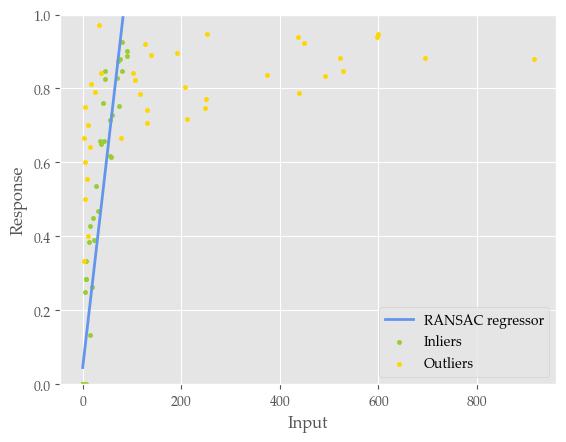

915 64 38 64 38


In [4]:


n_samples = 1000
n_outliers = 50

hetero_data = pd.DataFrame({'unknown_inf_rate' : unknown_inf_rate,
                            'val_inf_1' : val_inf_1,
                            'asym_inf_rate' : asym_inf_rate})
X = val_inf_1.reshape(-1,1)
y = unknown_inf_rate.reshape(-1,1)

ransac = linear_model.RANSACRegressor(residual_threshold=0.3, random_state=42)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

print("Unlinked_hetero : y={0:.6f}x+{1:.1f}".format(ransac.estimator_.coef_[0][0], ransac.estimator_.intercept_[0]))

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.ylim([0, 1])
plt.show()

print(len(line_y_ransac), len(X[inlier_mask]), len(X[outlier_mask]), len(y[inlier_mask]), len(y[outlier_mask]))

In [5]:
print(ransac.estimator_.intercept_)
print(ransac.estimator_.coef_)

ransac_res = y[inlier_mask] - ransac.predict(X[inlier_mask])
X_in = X[inlier_mask].reshape(1, -1)[0]
y_in = y[inlier_mask].reshape(1, -1)[0]
ransac_res = ransac_res.reshape(1,-1)[0]

ransac_df = pd.DataFrame({'X_in' : X_in,
                        #   'X_out' : X[outlier_mask],
                          'y_in' : y_in,
                        #   'y_out' : y[outlier_mask],
                          'ran_res' : ransac_res})

expr1 = 'X_in ~ y_in'
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
y1, X_U = dmatrices(expr1, ransac_df, return_type = 'dataframe')
results1 = het_white(ransac_df.ran_res, X_U)
print(lzip(keys, results1))

[0.04484197]
[[0.01160158]]
[('Lagrange Multiplier statistic:', 20.62212850136214), ("LM test's p-value", 3.3263021260036466e-05), ('F-statistic:', 14.499902774420272), ("F-test's p-value", 7.050047593029692e-06)]


In [6]:
        models_A = wls('np.log(asym_inf_rate) ~ val_inf_1', hetero_data, weights = w_A).fit()
        param_A = models_AW.params

        # results
        print("Unlinked_hetero : y={0:.6f}x+{1:.1f}".format(param_U.val_inf_1, param_U.Intercept))
        print("Asym_hetero : y={0:.6f}x+{1:.1f}".format(param_A.val_inf_1, param_A.Intercept))

        expr1 = 'unknown_inf_rate ~ val_inf_1'
        expr2 = 'asym_inf_rate ~ val_inf_1'
        keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
        y1, X_U = dmatrices(expr1, hetero_data, return_type = 'dataframe')
        y2, X_A = dmatrices(expr2, hetero_data, return_type = 'dataframe')
        results1 = het_white(models_U.resid, X_U)
        results2 = het_white(models_A.resid, X_A)
        print(lzip(keys, results1))
        print(lzip(keys, results2))

NameError: name 'wls' is not defined

NameError: name 'wls' is not defined

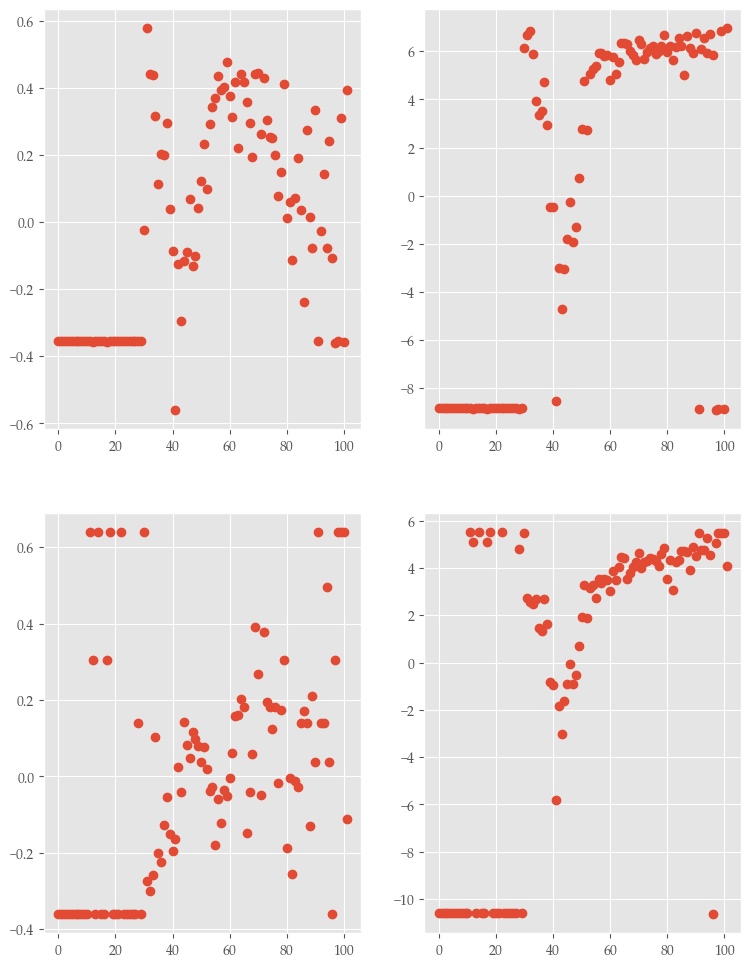

In [7]:
fig, ax = plt.subplots(figsize = (9,12), ncols = 2,nrows = 2)
ax[0,0].plot(res_U, 'o')
ax[0,1].plot(res_UL, 'o')
ax[1,0].plot(res_A, 'o')
ax[1,1].plot(res_AL, 'o')

res_data = pd.DataFrame({'abs(res_U)' : abs(res_U),
                        'abs(res_A)' : abs(res_A),
                        'abs(res_UL)' : abs(res_UL),
                        'abs(res_AL)' : abs(res_AL),
                        'val_inf_1' : val_inf_1})

res_U_model = ols('abs(res_U) ~ val_inf_1', res_data).fit()
res_A_model = ols('abs(res_A) ~ val_inf_1', res_data).fit()

w_U = res_U_model.predict()
w_U = 1/(w_U ** 2)

w_A = res_A_model.predict()
w_A = 1/(w_A ** 2)


models_UW = wls('np.log(unknown_inf_rate) ~ val_inf_1', hetero_data, weights = w_U).fit()
param_UW = models_UW.params
models_AW = wls('np.log(asym_inf_rate) ~ val_inf_1', hetero_data, weights = w_A).fit()
param_AW = models_AW.params

        
print("Unlinked_hetero : y={0:.6f}x+{1:.1f}".format(param_UW.val_inf_1, param_UW.Intercept))
print("Asym_hetero : y={0:.6f}x+{1:.1f}".format(param_AW.val_inf_1, param_AW.Intercept))

expr1 = 'unknown_inf_rate ~ val_inf_1'
expr2 = 'asym_inf_rate ~ val_inf_1'
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
y1, X_UW = dmatrices(expr1, hetero_data, return_type = 'dataframe')
y2, X_AW = dmatrices(expr2, hetero_data, return_type = 'dataframe')
results1 = het_white(models_UW.resid, X_UW)
results2 = het_white(models_AW.resid, X_AW)
print(lzip(keys, results1))
print(lzip(keys, results2))

[('Lagrange Multiplier statistic:', 16.789647994047055), ("LM test's p-value", 0.00022603425553291946), ('F-statistic:', 9.753363953328911), ("F-test's p-value", 0.00013603895513584842)]
[('Lagrange Multiplier statistic:', 72.39316781054396), ("LM test's p-value", 1.9055631517954657e-16), ('F-statistic:', 121.03496191997577), ("F-test's p-value", 2.559721011507612e-27)]


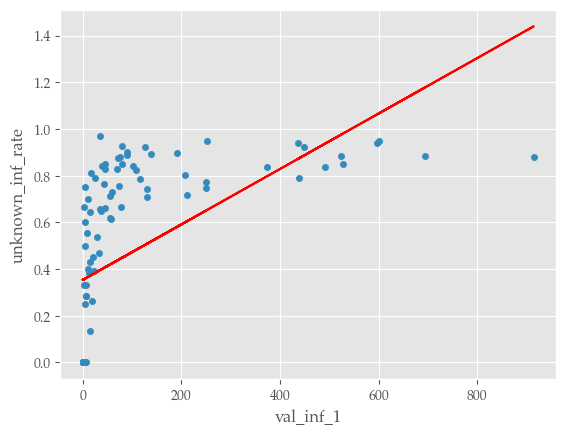

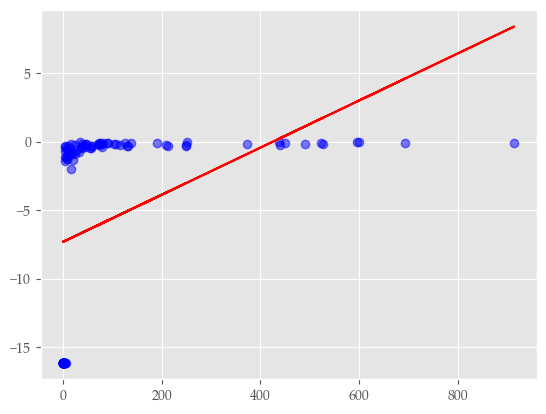

In [8]:
from statsmodels.formula.api import ols, wls
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

hetero_data = pd.DataFrame({'unknown_inf_rate' : unknown_inf_rate,
                            'val_inf_1' : val_inf_1,
                            'asym_inf_rate' : asym_inf_rate})
models = ols('unknown_inf_rate ~ val_inf_1', hetero_data).fit()
p = models.params

ax = hetero_data.plot(kind='scatter', x = 'val_inf_1', y = 'unknown_inf_rate')
ax.plot(val_inf_1, p.Intercept + p.val_inf_1*np.array(val_inf_1), 'r')

expr = 'unknown_inf_rate ~ val_inf_1'
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
y, X = dmatrices(expr, hetero_data, return_type = 'dataframe')
results = het_white(models.resid, X)
print(lzip(keys, results))
fig, ax = plt.subplots()

models = wls('np.log(unknown_inf_rate) ~ val_inf_1', hetero_data).fit()
# models = wls(unknown_inf_rate,val_inf_1, hetero_data).fit()
p = models.params
ax.plot(hetero_data.val_inf_1, np.log(hetero_data.unknown_inf_rate), "bo", alpha=0.5)
# ax = hetero_data.plot(kind='scatter', x = 'val_inf_1', y = 'unknown_inf_rate')
ax.plot(val_inf_1, p.Intercept + p.val_inf_1*np.array(val_inf_1), 'r')

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
y, X = dmatrices('np.log(unknown_inf_rate) ~ val_inf_1', hetero_data, return_type = 'dataframe')
results = het_white(models.resid, X)
print(lzip(keys, results))

[('Lagrange Multiplier statistic:', 19.16332383776703), ("LM test's p-value", 6.898220957322882e-05), ('F-statistic:', 11.451262579774399), ("F-test's p-value", 3.359799696997288e-05)]
[('Lagrange Multiplier statistic:', 32.028519969349446), ("LM test's p-value", 1.1094181251309801e-07), ('F-statistic:', 22.65797061586118), ("F-test's p-value", 7.904674225746075e-09)]


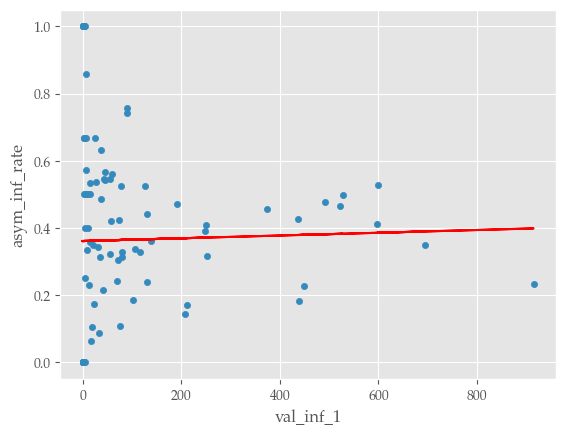

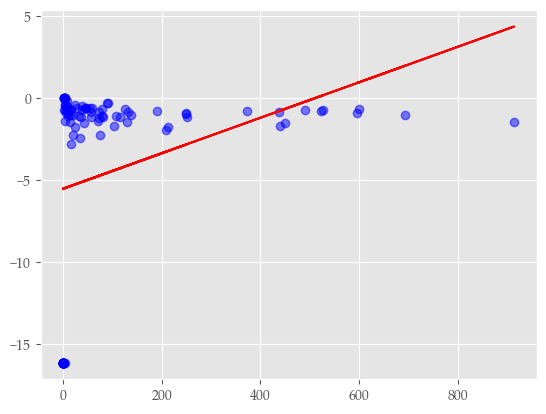

In [9]:
hetero_data = pd.DataFrame({'unknown_inf_rate' : unknown_inf_rate,
                            'val_inf_1' : val_inf_1,
                            'asym_inf_rate' : asym_inf_rate})
models = ols('asym_inf_rate ~ val_inf_1', hetero_data).fit()
p = models.params

ax = hetero_data.plot(kind='scatter', x = 'val_inf_1', y = 'asym_inf_rate')
ax.plot(val_inf_1, p.Intercept + p.val_inf_1*np.array(val_inf_1), 'r')

expr = 'asym_inf_rate ~ val_inf_1'
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
y, X = dmatrices(expr, hetero_data, return_type = 'dataframe')
results = het_white(models.resid, X)
print(lzip(keys, results))
fig, ax = plt.subplots()

models = wls('np.log(asym_inf_rate) ~ val_inf_1', hetero_data).fit()
# models = wls(unknown_inf_rate,val_inf_1, hetero_data).fit()
p = models.params
ax.plot(hetero_data.val_inf_1, np.log(hetero_data.asym_inf_rate), "bo", alpha=0.5)
# ax = hetero_data.plot(kind='scatter', x = 'val_inf_1', y = 'unknown_inf_rate')
ax.plot(val_inf_1, p.Intercept + p.val_inf_1*np.array(val_inf_1), 'r')

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value', 'F-statistic:', 'F-test\'s p-value']
y, X = dmatrices('np.log(asym_inf_rate) ~ val_inf_1', hetero_data, return_type = 'dataframe')
results = het_white(models.resid, X)
print(lzip(keys, results))

y=0.001187x+0.4 r =0.557 r_test =0.557 p =0.000
y=0.000041x+0.4 r =0.024 r_test =0.024 p =0.809

y=0.006051x+0.2 r =0.376 r_test =0.376 p =0.001
y=0.002869x+0.3 r =0.255 r_test =0.255 p =0.026

y=0.001495x+0.3 r =0.668 r_test =0.668 p =0.000
y=0.000284x+0.3 r =0.256 r_test =0.256 p =0.015



c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator


y=0.000145x+0.3 r =0.386 r_test =0.386 p =0.000
y=0.000054x+0.4 r =0.325 r_test =0.325 p =0.000



c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator


y=0.000390x+0.3 r =0.463 r_test =0.463 p =0.000
y=-0.000051x+0.4 r =-0.137 r_test =-0.137 p =0.112



c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator


y=-0.000020x+0.8 r =-0.113 r_test =-0.113 p =0.365
y=-0.000046x+0.5 r =-0.104 r_test =-0.104 p =0.407



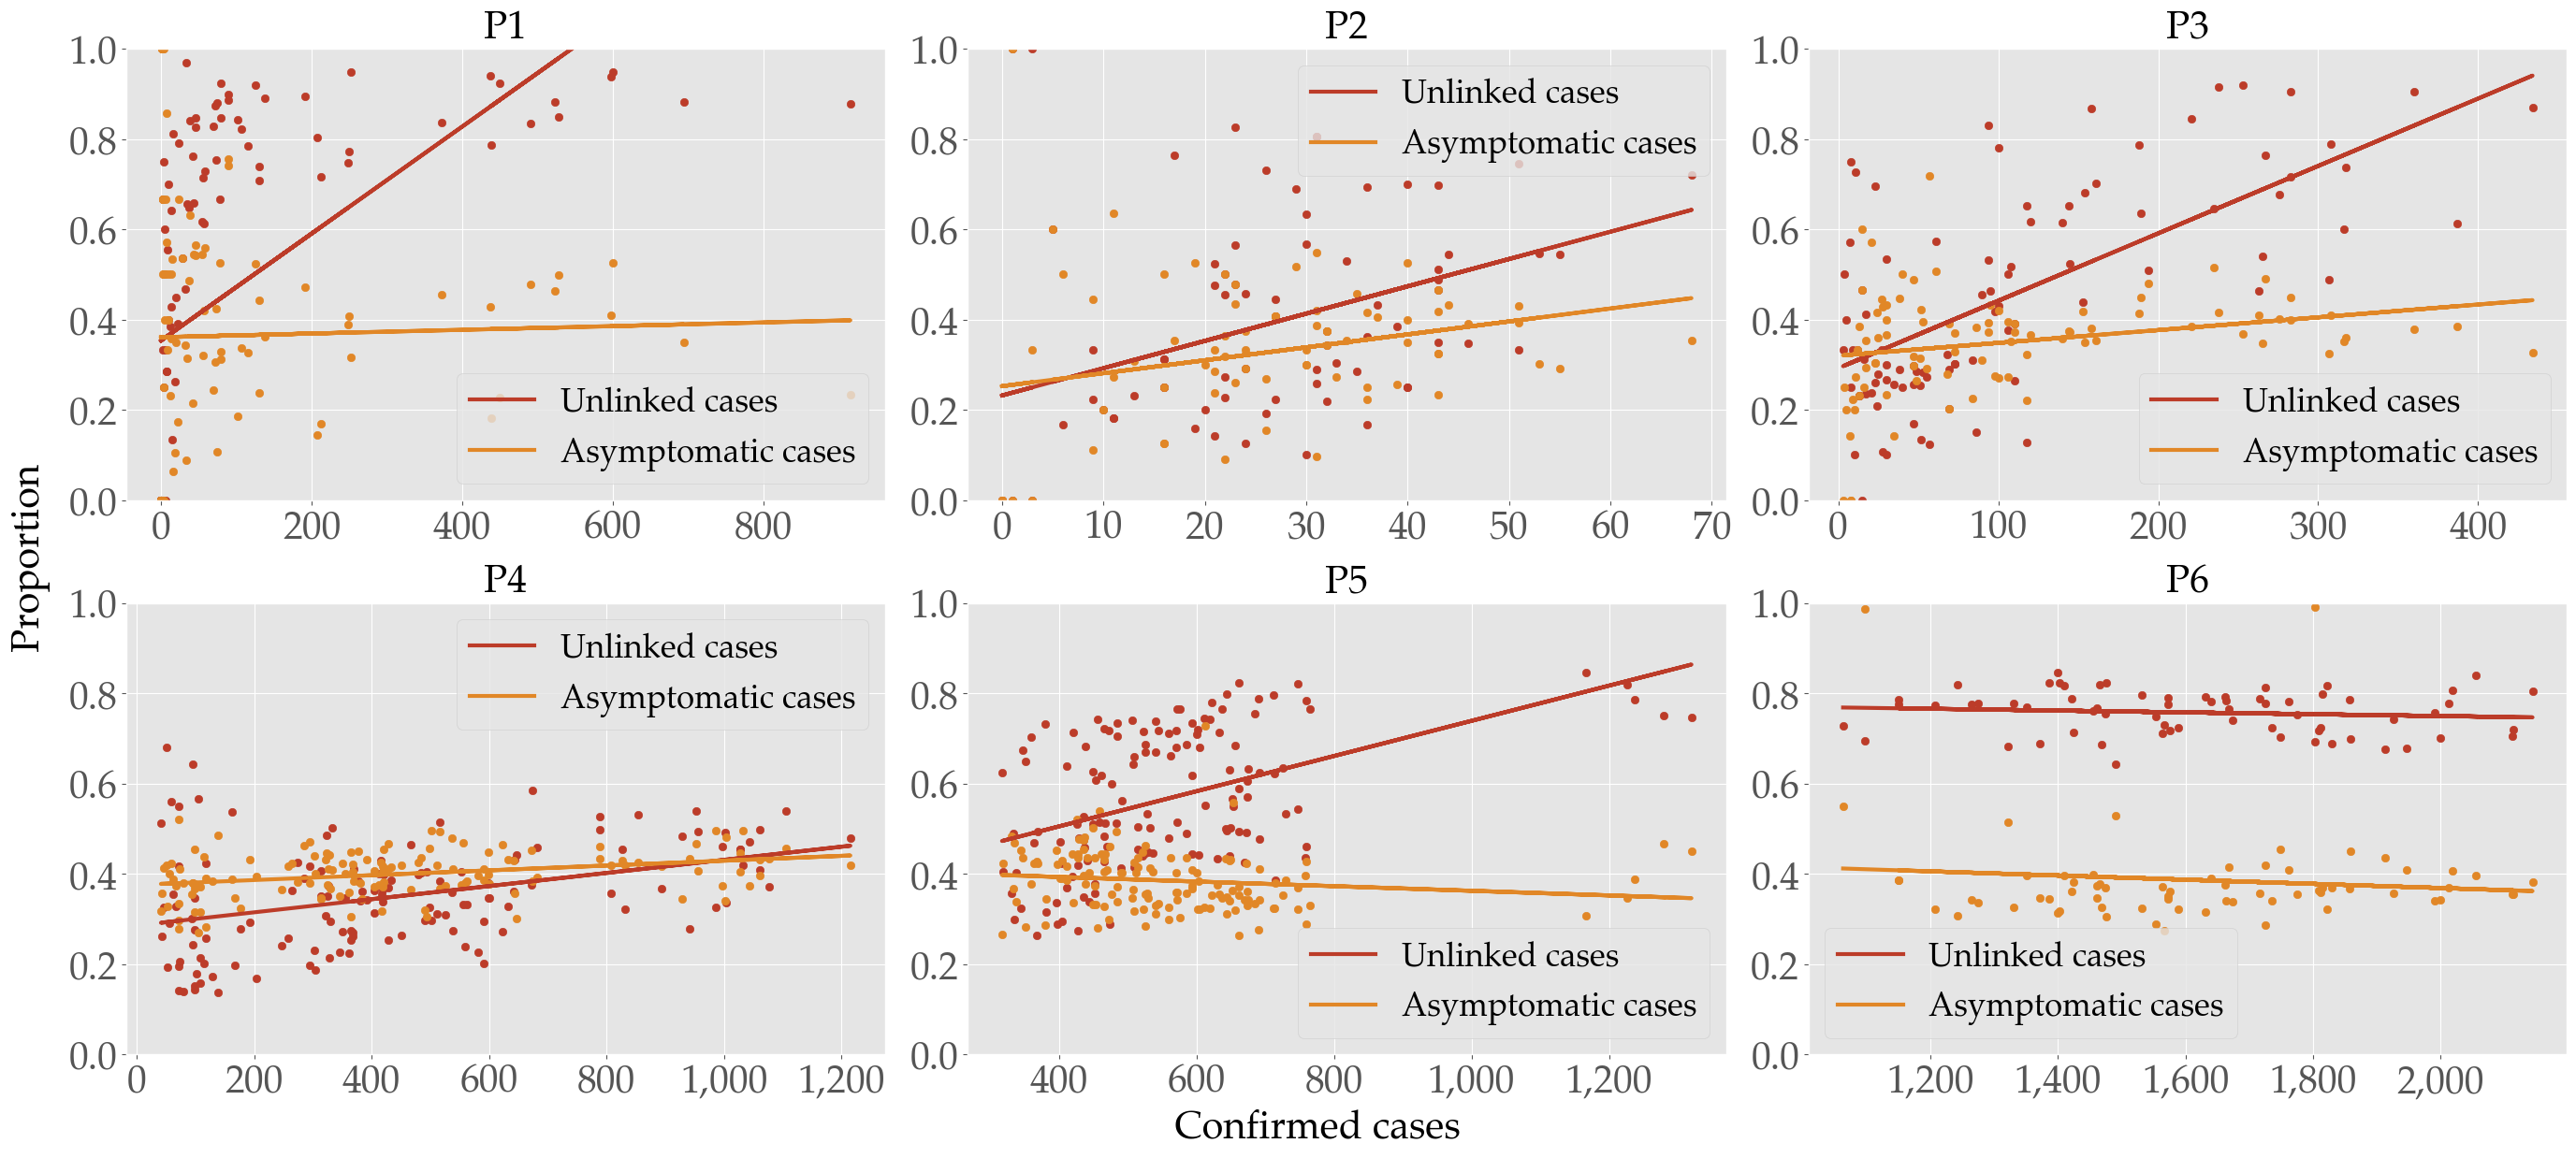

<Figure size 2700x1200 with 0 Axes>

In [10]:
# 전체구간 plot 지우지마!!
#!/usr/bin/python
# -*- coding:utf-8 -*-


style.use('default')
style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"

# plt.figure()
fig, ax = plt.subplots(2,3, figsize=(27,12))
# target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12', '2021-09-16']
# target_date = ['2020-01-19', '2021-07-15']
# for i in range(len(target_date)):
#     target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()
plt.figure(figsize=(27,12))
for i in range(len(target_date)-1):
    Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]


    #total_date = datetime(2021, 7, 11) - datetime(2020, 1, 30)
    total_date = target_date[i + 1] - target_date[i] 
    Net_df_Unknown = Net_df_1[Net_df_1['Primary_id'] == 0]
    Net_df_asym = Net_df_1[Net_df_1['Onset_date'] == '0']
    date_inf_1, val_unknown_1, val_inf_1, val_asym_1 = [],[],[],[]
    # print(i)
    # print(total_date.day)
    # print(target_date)
            
    for i_i_k in range(total_date.days):
        

        # tmp_date = datetime(2020, 1, 30).date()+timedelta(days=i_i_k)
        tmp_date = target_date[i] + timedelta(days=i_i_k)
        
        date_inf_1.append(tmp_date)
        counter_inf = Net_df[Net_df['inf_time'] == tmp_date]
        if len(counter_inf) != 0:
            val_inf_1.append(len(counter_inf))
        
        elif len(counter_inf) == 0:
            val_inf_1.append(0)

        counter_unknown = Net_df_Unknown[Net_df_Unknown['inf_time'] == tmp_date]
        if len(counter_unknown) != 0:
            val_unknown_1.append(len(counter_unknown))
        
        elif len(counter_unknown) == 0:
            val_unknown_1.append(0)
            
            
        counter_asym = Net_df_asym[Net_df_asym['inf_time'] == tmp_date]
        if len(counter_asym) != 0:
            val_asym_1.append(len(counter_asym))
        
        elif len(counter_asym) == 0:
            val_asym_1.append(0)
            

    
    unknown_inf_rate = []
    asym_inf_rate = []
    asym_unknown_rate = []

    for ii in range(total_date.days):
        if val_inf_1[ii] == 0:
            unknown_inf_rate.append(0)
        else:
            unknown_inf_rate.append(val_unknown_1[ii]/val_inf_1[ii])

        if val_inf_1[ii] == 0:
            asym_inf_rate.append(0)
        else:
            asym_inf_rate.append(val_asym_1[ii]/val_inf_1[ii])
        
        if val_unknown_1[ii] == 0:
            asym_unknown_rate.append(0)
        else:
            asym_unknown_rate.append(val_asym_1[ii]/val_unknown_1[ii])
            
            
    # val_inf_1 = [i2/sum(val_inf_1) for i2 in val_inf_1]
    val_inf_1 = np.array(val_inf_1)
    
    val_unknown_1 = np.array(val_unknown_1)
    val_asym_1 = np.array(val_asym_1)
    unknown_inf_rate = np.array(unknown_inf_rate)
    asym_inf_rate = np.array(asym_inf_rate)
    asym_unknown_rate = np.array(asym_unknown_rate)

    corr_coef1 = np.corrcoef(val_inf_1, unknown_inf_rate)[0,1]
    corr_coef2 = np.corrcoef(val_inf_1, asym_inf_rate)[0,1]
    m1, b1 = np.polyfit(val_inf_1, unknown_inf_rate, 1)
    m2, b2 = np.polyfit(val_inf_1, asym_inf_rate, 1)
    r1, p1 = scipy.stats.pearsonr(val_inf_1,unknown_inf_rate)
    r2, p2 = scipy.stats.pearsonr(val_inf_1, asym_inf_rate)
    
    if i <3:
        ax[0,i].scatter(val_inf_1,unknown_inf_rate, color = '#BC3C29FF')
        ax[0,i].scatter(val_inf_1,asym_inf_rate, color = '#E18727FF')
        ax[0,i].set_title('P' + str(i+1), fontsize=30)
        ax[0,i].set_ylim([0,1.0])
        ax[0,i].plot(val_inf_1,val_inf_1 * m1 + b1, label="Unlinked cases", linewidth=3, color = '#BC3C29FF')
        ax[0,i].plot(val_inf_1,val_inf_1 * m2 + b2, label="Asymptomatic cases", linewidth=3, color = '#E18727FF')

        for tick in ax[0,i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(30)
        for tick in ax[0,i].yaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(30) 
            
        ax[0,i].legend(fontsize=25)

        print("y={0:.6f}x+{1:.1f}".format(m1, b1) + ' r ='  "{0:.3f}".format(corr_coef1) + ' r_test ='  "{0:.3f}".format(r1) + ' p ='  "{0:.3f}".format(p1))
        print("y={0:.6f}x+{1:.1f}".format(m2, b2) + ' r ='  "{0:.3f}".format(corr_coef2) + ' r_test ='  "{0:.3f}".format(r2) + ' p ='  "{0:.3f}".format(p2))
        print('')
        
    elif i>=3:
        ax[1,i-3].scatter(val_inf_1,unknown_inf_rate, color = '#BC3C29FF')
        ax[1,i-3].scatter(val_inf_1,asym_inf_rate, color = '#E18727FF')
        ax[1,i-3].set_title('P' + str(i+1), fontsize=30)
        ax[1,i-3].set_ylim([0,1.0])
        ax[1,i-3].plot(val_inf_1,val_inf_1 * m1 + b1, label="Unlinked cases", linewidth=3, color = '#BC3C29FF')
        ax[1,i-3].plot(val_inf_1,val_inf_1 * m2 + b2, label="Asymptomatic cases", linewidth=3, color = '#E18727FF')
        xticks_ = ax[1,i-3].get_xticks(minor=False)
        xticks_2 = []
        for i2 in range(len(xticks_)):
            xticks_2.append(str(format(xticks_.astype(int)[i2], ',')))
        ax[1,i-3].set_xticklabels(xticks_2, fontsize=30)
        
        # for tick in ax[1,i-3].xaxis.get_majorticklabels():  # example for xaxis
        #     tick.set_fontsize(30)
        for tick in ax[1,i-3].yaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(30) 
        
        ax[1,i-3].legend(fontsize=25)
        print("y={0:.6f}x+{1:.1f}".format(m1, b1) + ' r ='  "{0:.3f}".format(corr_coef1) + ' r_test ='  "{0:.3f}".format(r1) + ' p ='  "{0:.3f}".format(p1))
        print("y={0:.6f}x+{1:.1f}".format(m2, b2) + ' r ='  "{0:.3f}".format(corr_coef2) + ' r_test ='  "{0:.3f}".format(r2) + ' p ='  "{0:.3f}".format(p2))
        print('')

fig.text(0.5, -0.01, 'Confirmed cases', va='center', ha='center', fontsize=30)
fig.text(-0.01, 0.5, 'Proportion', va='center', ha='center', rotation='vertical', fontsize = 30)
fig.tight_layout()
fig.savefig('Total Period scatter plot.png', bbox_inches='tight')